<a href="https://colab.research.google.com/github/BrendonBernardino/pixel_classification_cow/blob/master/Convolutional_classif_cow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import shutil
# import random
tf.__version__

'2.17.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# origem = "/content/drive/MyDrive/Dataset_TCC/ESP_Master"
# destino_80 = "/content/drive/MyDrive/Dataset_TCC/ESP_Master/training_set"
# destino_20 = "/content/drive/MyDrive/Dataset_TCC/ESP_Master/test_set"

# imagens = [arquivo for arquivo in os.listdir(origem) if arquivo.lower().endswith(('.png', '.jpg', '.jpeg'))]
# random.shuffle(imagens)

# total_imagens = len(imagens)
# limite_80 = int(total_imagens * 0.8)

# for i, imagem in enumerate(imagens):
#     origem_imagem = os.path.join(origem, imagem)
#     if i < limite_80:
#         destino_imagem = os.path.join(destino_80, imagem)
#     else:
#         destino_imagem = os.path.join(destino_20, imagem)

#     shutil.move(origem_imagem, destino_imagem)

# print("Divisão concluída! 80% em 'treino' e 20% em 'teste'.")

In [8]:
# diretorio_with_cow = '/content/drive/MyDrive/Dataset_TCC/ESP_Master/training_set/with_cow'
# diretorio_no_cow = '/content/drive/MyDrive/Dataset_TCC/ESP_Master/training_set/no_cow'

# files_with_cow = [os.path.join(diretorio_with_cow, f) for f in sorted(os.listdir(diretorio_with_cow))]
# files_no_cow = [os.path.join(diretorio_no_cow, f) for f in sorted(os.listdir(diretorio_no_cow))]
# # print(files_with_cow)
# # print(files_no_cow)

In [3]:
#aumenta no dataset com imagens rotacionadas e modificadas
training_generator = ImageDataGenerator(rescale = 1./255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range = 0.2)

In [4]:
training_dataset = training_generator.flow_from_directory('/content/drive/MyDrive/Dataset_TCC/ESP_Master/training_set',
                                                          target_size = (64, 64),
                                                          batch_size = 8,
                                                          class_mode = 'categorical',
                                                          shuffle = True)

Found 410 images belonging to 2 classes.


In [5]:
training_dataset.class_indices

{'no_cow': 0, 'with_cow': 1}

In [6]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_dataset = test_generator.flow_from_directory('/content/drive/MyDrive/Dataset_TCC/ESP_Master/test_set',
                                                  target_size = (64, 64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 103 images belonging to 2 classes.


In [10]:
network = Sequential()
network.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (64, 64, 3)))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 2, activation = 'softmax'))
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
historico = network.fit(training_dataset, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.7585 - loss: 0.5764
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.8100 - loss: 0.3365
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8594 - loss: 0.3622 
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.8335 - loss: 0.3449
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8881 - loss: 0.2881 
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8670 - loss: 0.3092
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9114 - loss: 0.2521 
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8974 - loss: 0.2376
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9207 - loss: 0.1960 
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9213 - loss: 0.2016
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8823 - loss: 0.2642 
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy

In [13]:
previsoes = network.predict(test_dataset)
previsoes

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 437ms/step


array([[9.83148813e-01, 1.68512575e-02],
       [9.29933548e-01, 7.00664222e-02],
       [9.90076602e-01, 9.92337149e-03],
       [9.85629857e-01, 1.43701136e-02],
       [9.90672767e-01, 9.32726543e-03],
       [8.59015882e-01, 1.40984118e-01],
       [9.88326848e-01, 1.16731059e-02],
       [9.46663022e-01, 5.33369556e-02],
       [9.12185192e-01, 8.78148824e-02],
       [9.11165535e-01, 8.88344496e-02],
       [9.02845442e-01, 9.71545801e-02],
       [9.93187666e-01, 6.81238202e-03],
       [9.81912255e-01, 1.80877596e-02],
       [9.56250906e-01, 4.37491164e-02],
       [9.92780268e-01, 7.21977837e-03],
       [9.97655034e-01, 2.34495872e-03],
       [9.99986172e-01, 1.38319620e-05],
       [9.99718130e-01, 2.81812041e-04],
       [9.54757571e-01, 4.52424213e-02],
       [9.83351171e-01, 1.66487861e-02],
       [8.76584589e-01, 1.23415366e-01],
       [1.06899845e-09, 1.00000000e+00],
       [1.33129943e-08, 1.00000000e+00],
       [9.74772529e-09, 1.00000000e+00],
       [6.316633

In [14]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, previsoes)

0.970873786407767

<Axes: >

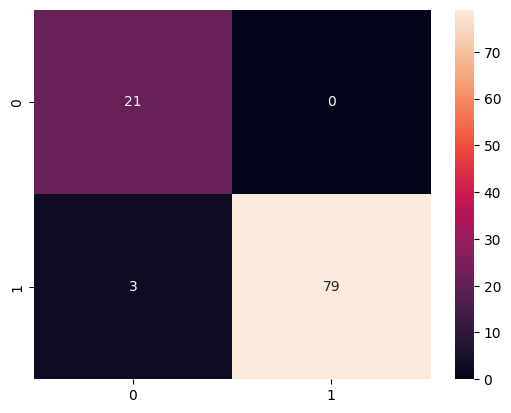

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, previsoes)
sns.heatmap(cm, annot = True)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, previsoes))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.96      0.98        82

    accuracy                           0.97       103
   macro avg       0.94      0.98      0.96       103
weighted avg       0.97      0.97      0.97       103



In [20]:
#Salvando modelo da rede neural

model_json = network.to_json()
with open("/content/drive/MyDrive/Dataset_TCC/network_conv.json", "w") as json_file:
    json_file.write(model_json)

In [22]:
from keras.models import save_model
network_saved = save_model(network, '/content/drive/MyDrive/Dataset_TCC/weights_conv.hdf5')
# network.save_weights("model.h5")
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [28]:
#Carregando modelo
with open('/content/drive/MyDrive/Dataset_TCC/network_conv.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model_json

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_1", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer_1"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [29]:
network_loaded = tf.keras.models.model_from_json(loaded_model_json)
network_loaded.load_weights('/content/drive/MyDrive/Dataset_TCC/weights_conv.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

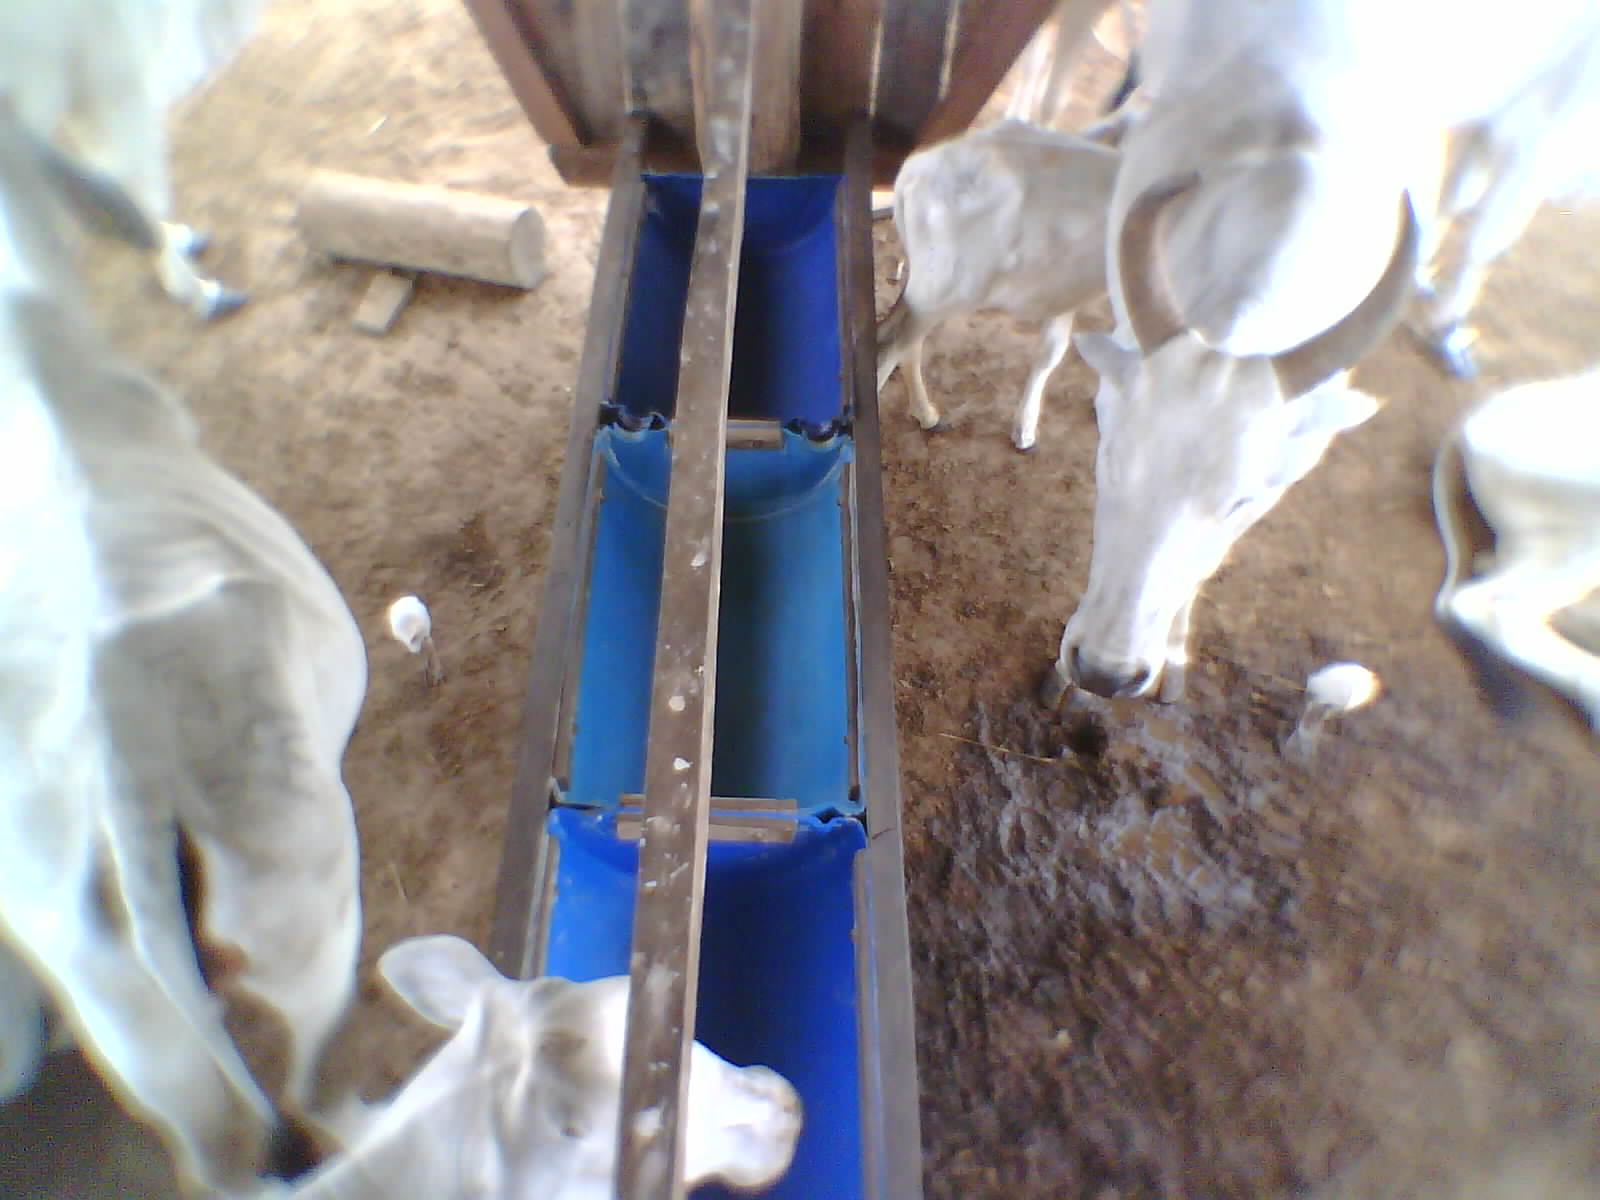

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Com vaca


In [37]:
#Testando modelo treinado

imagem = cv2.imread('/content/drive/MyDrive/Dataset_TCC/ESP_Slave/pic499.jpg')
cv2_imshow(imagem)
imagem = cv2.resize(imagem, (64, 64))
# cv2_imshow(imagem)
imagem = imagem / 255
imagem = imagem.reshape(-1, 64, 64, 3)
# imagem.shape

previsao = network_loaded.predict(imagem)
previsao = np.argmax(previsao)
if previsao == 0:
    print('Sem vaca')
else:
    print('Com vaca')